# Caveats, differences from main PWWB repo
- Bounding boxes are different. In other places it's: `-118.75, 33.5, -117.5, 34.5`, in others it's `33.6, 34.3, -118.6, -117.9`. I don't know why the differences are here, so I'll just use the later.

# Accessing the data
Using the AirNow API, we'll request a json of the data we need.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# get airnow data
if os.path.exists('airnow.json'):
    print("airnow.json already exists; skipping request...")
else:
    date_start = '2025-01-10T00'
    date_end = '2025-01-16T23'
    airnow_api_key = print("YOU NEED TO ADD YOUR API KEY!")
    URL = "https://www.airnowapi.org/aq/data"
    
    # location given here
    
    # defining a params dict for the parameters to be sent to the API
    PARAMS = {
        'startDate':date_start,
        'endDate':date_end,
        'parameters':'PM25',
        'BBOX':'-118.75,33.5,-117.5,34.5',
        'dataType':'B',
        'format':'application/json',
        'verbose':'0',
        'monitorType':'2',
        'includerawconcentrations':'1',
        'API_KEY':airnow_api_key
    }
    
    # sending get request and saving the response as response object
    response = requests.get(url = URL, params = PARAMS)

    # extracting data in json format
    airnow_data = response.json()
    with open('airnow.json', 'w') as file:
        json.dump(airnow_data, file)
        print("JSON data saved to airnow.json")
    
# open json file and convert to dataframe
with open('airnow.json', 'r') as file:
    airnow_data = json.load(file)
airnow_df = pd.json_normalize(airnow_data)
airnow_df[0:20]

airnow.json already exists; skipping request...


,Latitude,Longitude,UTC,Parameter,Unit,Value,RawConcentration,AQI,Category
0,34.276320,-118.683690,2025-01-10T00:00,PM2.5,UG/M3,0.0,-1.0,0,1
1,34.199200,-118.533100,2025-01-10T00:00,PM2.5,UG/M3,2.9,1.2,16,1
2,34.383300,-118.528300,2025-01-10T00:00,PM2.5,UG/M3,2.1,2.1,12,1
3,34.181977,-118.363036,2025-01-10T00:00,PM2.5,UG/M3,60.5,53.2,155,4
4,34.066429,-118.226755,2025-01-10T00:00,PM2.5,UG/M3,55.3,50.4,150,3
5,33.901400,-118.205000,2025-01-10T00:00,PM2.5,UG/M3,21.6,12.2,74,2
6,33.793713,-118.171019,2025-01-10T00:00,PM2.5,UG/M3,21.6,10.8,74,2
7,33.830586,-117.938509,2025-01-10T00:00,PM2.5,UG/M3,36.6,40.0,104,3
8,34.143900,-117.850800,2025-01-10T00:00,PM2.5,UG/M3,26.3,23.7,83,2
9,34.276320,-118.683690,2025-01-10T01:00,PM2.5,UG/M3,0.0,-999.0,0,1


This should generate a URL like this:
```
https://www.airnowapi.org/aq/data/?startDate=2025-01-10T00&endDate=2025-01-16T23&parameters=PM25&BBOX=-118.6,33.6,-117.9,34.3&dataType=B&format=application/json&verbose=0&monitorType=2&includerawconcentrations=1&API_KEY=YOUR-API-KEY-HERE
```

You can also use a query tool from AirNow:
- https://docs.airnowapi.org/Data/query

In [2]:
# group data by time; every element in the list is a single frame containing 9 stations
list_df = [group for name, group in airnow_df.groupby('UTC')]
print(f"Number of frames: {len(list_df)}")
display(list_df[0])
display(list_df[-1])

Number of frames: 168


,Latitude,Longitude,UTC,Parameter,Unit,Value,RawConcentration,AQI,Category
0,34.276320,-118.683690,2025-01-10T00:00,PM2.5,UG/M3,0.0,-1.0,0,1
1,34.199200,-118.533100,2025-01-10T00:00,PM2.5,UG/M3,2.9,1.2,16,1
2,34.383300,-118.528300,2025-01-10T00:00,PM2.5,UG/M3,2.1,2.1,12,1
3,34.181977,-118.363036,2025-01-10T00:00,PM2.5,UG/M3,60.5,53.2,155,4
4,34.066429,-118.226755,2025-01-10T00:00,PM2.5,UG/M3,55.3,50.4,150,3
5,33.901400,-118.205000,2025-01-10T00:00,PM2.5,UG/M3,21.6,12.2,74,2
6,33.793713,-118.171019,2025-01-10T00:00,PM2.5,UG/M3,21.6,10.8,74,2
7,33.830586,-117.938509,2025-01-10T00:00,PM2.5,UG/M3,36.6,40.0,104,3
8,34.143900,-117.850800,2025-01-10T00:00,PM2.5,UG/M3,26.3,23.7,83,2


,Latitude,Longitude,UTC,Parameter,Unit,Value,RawConcentration,AQI,Category
1448,34.276320,-118.683690,2025-01-16T23:00,PM2.5,UG/M3,1.9,4.0,11,1
1449,34.199200,-118.533100,2025-01-16T23:00,PM2.5,UG/M3,0.0,0.0,0,1
1450,34.383300,-118.528300,2025-01-16T23:00,PM2.5,UG/M3,4.7,6.9,26,1
1451,34.181977,-118.363036,2025-01-16T23:00,PM2.5,UG/M3,5.7,6.9,32,1
1452,34.066429,-118.226755,2025-01-16T23:00,PM2.5,UG/M3,5.9,4.0,33,1
1453,33.901400,-118.205000,2025-01-16T23:00,PM2.5,UG/M3,3.3,4.5,18,1
1454,33.793713,-118.171019,2025-01-16T23:00,PM2.5,UG/M3,4.2,2.9,23,1
1455,33.830586,-117.938509,2025-01-16T23:00,PM2.5,UG/M3,7.1,7.4,39,1
1456,34.143900,-117.850800,2025-01-16T23:00,PM2.5,UG/M3,5.3,7.4,29,1


# Interpolate
- This seems to only work on one frame...? why doesn't the freaking training notebook have this code...????asdfjiishdfjkavhjk
- I believe i have to preprocess one frame at a time. the problem is, this json file has the data like... one pixel at a time i think? is each row a sensor? (i think yes. thre seem to be 9...? the docs aren't clear on how many sensors there are and where they are... this also means i'll have to update the convlstm model to output 8 sensors)
- also wtf is value vs aqi?? its not even on the docs https://docs.airnowapi.org/Data/docs like wtf

In [3]:
def preprocess_ground_sites(df, dim, latMax, latMin, lonMax, lonMin):
    latDist, lonDist = abs(latMax - latMin), abs(lonMax - lonMin)
    unInter = np.zeros((dim,dim))
    dfArr = np.array(df[['Latitude','Longitude','Value']])
    for i in range(dfArr.shape[0]):
        # Calculate x
        x = int(((latMax - dfArr[i,0]) / latDist) * dim)
        if x >= dim:
            x = dim - 1
        if x <= 0:
            x = 0
        # Calculate y
        y = dim - int(((lonMax + abs(dfArr[i,1])) / lonDist) * dim)
        if y >= dim:
            y = dim - 1
        if y <= 0:
            y = 0
        if dfArr[i,2] < 0:
            unInter[x,y] = 0
        else:
            unInter[x,y] = dfArr[i,2]
    return unInter

Grid-based AirNow Data


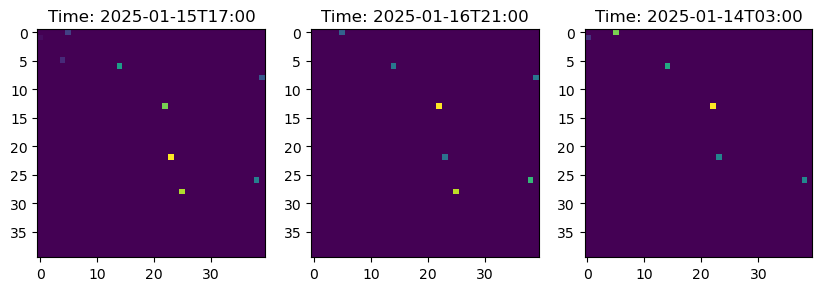

In [4]:
lat_bottom, lat_top = 33.6, 34.3
lon_bottom, lon_top = -118.6, -117.9
dim = 40

# preprocess ground sites -- converting dataframe of stations into a grid
list_unInter = [preprocess_ground_sites(df, dim, lat_top, lat_bottom, lon_top, lon_bottom) for df in list_df]

# plot out 3 random images
np.random.seed(42)
print("Grid-based AirNow Data")
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for idx, ax in enumerate(axes):
    randIdx = np.random.choice(range(0, len(list_unInter)), replace=False)
    ax.imshow(list_unInter[randIdx])
    ax.set_title(f"Time: {list_df[randIdx]['UTC'].iloc[0]}")    

plt.show()

In [5]:
from scipy.interpolate import NearestNDInterpolator, LinearNDInterpolator

def interpolate_frame(f, dim):
    i = 0
    interpolated = []
    count = 0
    idx = 0
    x_list = []
    y_list = []
    values = []
    for x in range(f.shape[0]):
        for y in range(f.shape[1]):
            if f[x,y] != 0:
                x_list.append(x)
                y_list.append(y)
                values.append(f[x,y])
    coords = list(zip(x_list,y_list))
    try:
        interp = NearestNDInterpolator(coords, values)
        X = np.arange(0,dim)
        Y = np.arange(0,dim)
        X, Y = np.meshgrid(X, Y)
        Z = interp(X, Y)
    except ValueError:
        Z = np.zeros((dim,dim))
    interpolated = Z
    count += 1
    i += 1
    interpolated = np.array(interpolated)
    return interpolated

Interpolated Grid-based AirNow Data


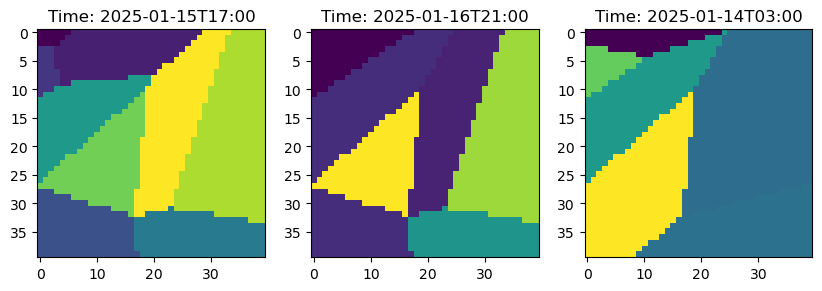

In [6]:
# interpolate
list_inter = [interpolate_frame(unInter, dim) for unInter in list_unInter]

# print 3 frames
np.random.seed(42)
print("Interpolated Grid-based AirNow Data")
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for idx, ax in enumerate(axes):
    randIdx = np.random.choice(range(0, len(list_inter)), replace=False)
    ax.imshow(list_inter[randIdx])
    ax.set_title(f"Time: {list_df[randIdx]['UTC'].iloc[0]}")    
    
plt.show()

# Scale

Scaled Interpolated Grid-based AirNow Data


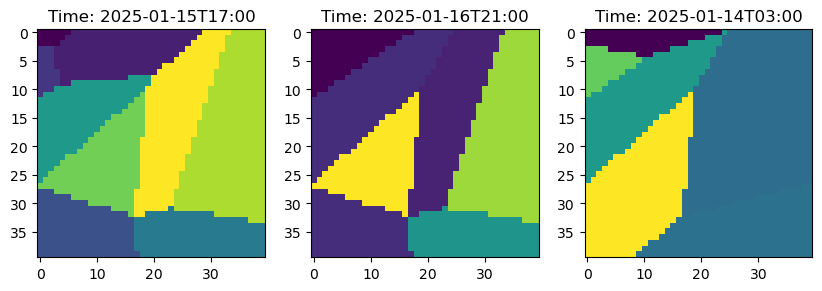

In [7]:
# we scale each sample relative to other samples
def std_scale(data):
    mean = np.mean(data)
    var = np.var(data)
    return (data - mean) / np.sqrt(var)
    
scaled_samples = std_scale(np.array(list_inter))

# print 3 frames
np.random.seed(42)
print("Scaled Interpolated Grid-based AirNow Data")
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for idx, ax in enumerate(axes):
    randIdx = np.random.choice(range(0, len(scaled_samples)), replace=False)
    ax.imshow(scaled_samples[randIdx])
    ax.set_title(f"Time: {list_df[randIdx]['UTC'].iloc[0]}")    
    
plt.show()

In [8]:
# ensure actual scaling has occurred
randIdx = np.random.choice(range(0, len(list_inter)), replace=False)
print(f"Examining data at frame {randIdx}\n")
print("Interpolated data:")
print(list_inter[randIdx], '\n')
print("Interpolated and scaled data:")
print(scaled_samples[randIdx])

Examining data at frame 87

Interpolated data:
[[ 2.6  2.6  2.6 ... 21.2 21.2 21.2]
 [ 2.6  2.6  2.6 ... 21.2 21.2 21.2]
 [ 2.6  2.6  2.6 ... 21.2 21.2 21.2]
 ...
 [12.9 12.9 12.9 ...  1.   1.   1. ]
 [12.9 12.9 12.9 ...  1.   1.   1. ]
 [12.9 12.9 12.9 ...  1.   1.   1. ]] 

Interpolated and scaled data:
[[-0.8152621  -0.8152621  -0.8152621  ...  0.4559183   0.4559183
   0.4559183 ]
 [-0.8152621  -0.8152621  -0.8152621  ...  0.4559183   0.4559183
   0.4559183 ]
 [-0.8152621  -0.8152621  -0.8152621  ...  0.4559183   0.4559183
   0.4559183 ]
 ...
 [-0.11132887 -0.11132887 -0.11132887 ... -0.92461096 -0.92461096
  -0.92461096]
 [-0.11132887 -0.11132887 -0.11132887 ... -0.92461096 -0.92461096
  -0.92461096]
 [-0.11132887 -0.11132887 -0.11132887 ... -0.92461096 -0.92461096
  -0.92461096]]


# Visualizing preprocessed, interpolated, and scaled data

Frame: 57, Time: 2025-01-12T09:00


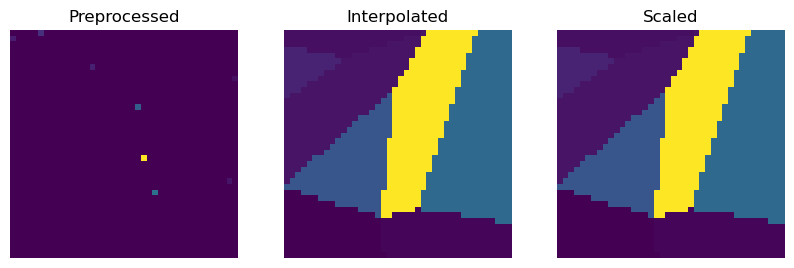

In [9]:
# compare all 3 levels
randIdx = np.random.choice(range(0, len(list_inter)), replace=False)
compare = [
    ("Preprocessed", list_unInter[randIdx]), 
    ("Interpolated", list_inter[randIdx]), 
    ("Scaled", scaled_samples[randIdx])
]
print(f"Frame: {randIdx}, Time: {list_df[randIdx]['UTC'].iloc[0]}")
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for idx, ax in enumerate(axes):
    ax.imshow(compare[idx][1])
    ax.set_title(compare[idx][0])
    ax.axis("off")
    
plt.show()

# Generate final input

In [10]:
n_samples, n_frames, n_channels = 1, 1, 2
payload = np.zeros((n_samples, n_frames, dim, dim, n_channels))
payload[0, 0, :, :, 0] = scaled_samples
# payload[0, 0, :, :, 1] = scaled_hrrr ??
# also guessing that since this is from the inference script, shape will be (1, 1, 40, 40, 2); 1 sample, 1 frame (is not 5?), 40x40, 2 channels

ValueError: could not broadcast input array from shape (168,40,40) into shape (40,40)